In [3]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [4]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [5]:

import sklearn
import warnings
 
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
 
warnings.filterwarnings('ignore')


In [6]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:

import pandas as pd

In [7]:
df=pd.read_csv('5_yrs_data_of_wind.csv')

In [48]:
df


,DateTime,Air temperature,Pressure,Wind speed,Power generated by system
0,2019-01-01 01:00:00,10.926,0.979103,9.014,33.6881
1,2019-01-01 02:00:00,9.919,0.979566,9.428,37.2619
2,2019-01-01 03:00:00,8.567,0.979937,8.700,30.5029
3,2019-01-01 04:00:00,7.877,0.980053,8.481,28.4192
4,2019-01-01 05:00:00,7.259,0.979867,8.383,27.3703
...,...,...,...,...,...
43818,2023-12-31 19:00:00,11.713,0.985015,8.703,30.4221
43819,2023-12-31 20:00:00,12.115,0.985244,8.854,32.0366
43820,2023-12-31 21:00:00,11.856,0.985639,9.333,36.3990
43821,2023-12-31 22:00:00,10.761,0.986212,9.457,37.7404


In [25]:
df[['DateTime' ,'Pressure']]

,DateTime,Pressure
0,01-01-2019 01:00,0.979103
1,01-01-2019 02:00,0.979566
2,01-01-2019 03:00,0.979937
3,01-01-2019 04:00,0.980053
4,01-01-2019 05:00,0.979867
...,...,...
8754,31-12-2019 19:00,0.980796
8755,31-12-2019 20:00,0.980492
8756,31-12-2019 21:00,0.980180
8757,31-12-2019 22:00,0.979924


In [8]:
X = df.iloc[:,1:4]
y=df.iloc[:,4]


In [9]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
 


# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=100, random_state=42, oob_score=True)
 
# Fit the regressor with x and y data
regressor.fit(X, y)
print("done")

done


In [10]:
from sklearn.metrics import mean_squared_error, r2_score
 
# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')
 
# Making predictions on the same data or new data
predictions = regressor.predict(X)
 
# Evaluating the model
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')
 
r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

Out-of-Bag Score: 0.9996840832394616
Mean Squared Error: 0.012368576186568583
R-squared: 0.9999583603431041


In [11]:
new_df=pd.read_csv('train.csv')
new_df

,DateTime,Air temperature,Pressure,Wind speed,Power generated by system
0,01-01-2024 00:00,6.609,0.988077,10.868,53.18100
1,01-01-2024 01:00,5.257,0.988969,10.679,51.90830
2,01-01-2024 02:00,4.374,0.989708,11.200,56.35400
3,01-01-2024 03:00,2.913,0.990171,10.962,54.93680
4,01-01-2024 04:00,1.152,0.990264,11.307,57.74310
...,...,...,...,...,...
2179,31-03-2024 19:00,27.835,0.973886,4.855,3.49390
2180,31-03-2024 20:00,28.390,0.973506,6.066,8.96133
2181,31-03-2024 21:00,28.487,0.973034,7.075,15.10510
2182,31-03-2024 22:00,28.555,0.972540,6.892,13.70680


In [18]:
new_X = new_df.iloc[:,1:4]
new_Y=new_df.iloc[:,4]
new_c={'Air temperature':-2.907,'Pressure':0.986184,'Wind speed':3.611}
new_c=pd.DataFrame([new_c])
new_c

,Air temperature,Pressure,Wind speed
0,-2.907,0.986184,3.611


In [27]:

scores=[]
y_pred=regressor.predict(new_X)

y_pred

array([53.038083, 51.878595, 56.222672, ..., 15.025596, 13.598481,
       12.865699])

In [14]:
scores.append(regressor.score(new_X,new_Y))

In [15]:
scores

[0.9999593620773484]

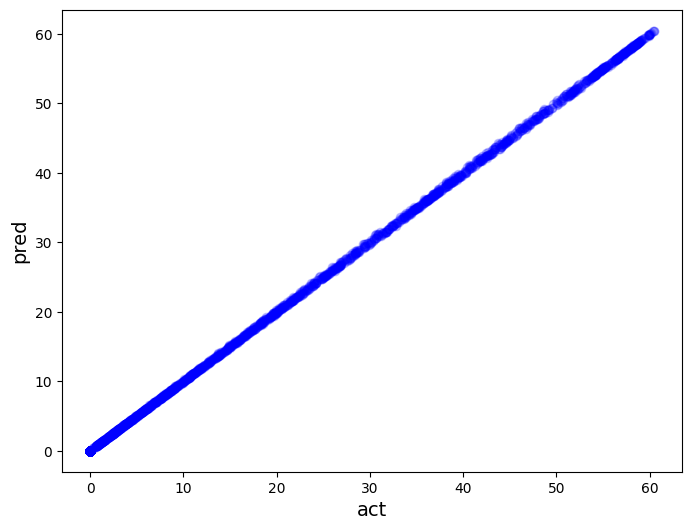

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(new_Y,y_pred,color='blue', alpha=0.2)
plt.xlabel('act')
plt.ylabel('pred')
plt.title('')
plt.show()